Extending on part one I will look to value an exotic option without an explicit analytical solution. To do this I will simulate stock paths using a CEV model before running a Monte Carlo simulation. For the purpose of this option I have simply selected an up and out call option. The code can easily be redefined by simply replacing the payoff function to allow for a variety of options to be valued.


Given that the path taken by the share is now relevant to the value of the option the variable 'lifetime' is added. To increase the number of periods considered and to recreate real trading conditions the lifetime number would have to be infinite. We simply use 12 to replicate a monthly period in this example however for accuracy a considerably higher integer should be used.

In [42]:
#required libraries
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

In [60]:


#Stock specific info
sigma = 0.15
risk_free = 0.05
S_0 = 10
mu = 0.15

#Option specific info
L=15 #up and out barrier 
K=10 #strike price
T=1 #maturity
lifetime = 12 #simulating the share path monthly

In [61]:
def share_path(S_0, risk_free_rate, sigma, Z, dT):
    return S_0*np.exp(np.cumsum((risk_free_rate - sigma**2/2)*dT + sigma*np.sqrt(dT)*Z,1))

def generate_share_paths(risk_free_rate, S_0, sigma, nb_samples, lifetime, maturity):
    dT = maturity / lifetime
    Z = norm.rvs(size = [2, nb_samples*lifetime])
    Z_corr = np.matmul(np.linalg.cholesky(np.array([[1, .2], [.2, 1]])), Z)
    S = share_path(S_0, risk_free_rate, sigma, np.reshape(Z_corr[0], (nb_samples, lifetime)), dT)
    return S

In [62]:
np.random.seed(0)

share = [None]*100

for i in range(100):
    share[i]= generate_share_paths(risk_free, S_0, sigma,(i+1)*1000, 12, T)

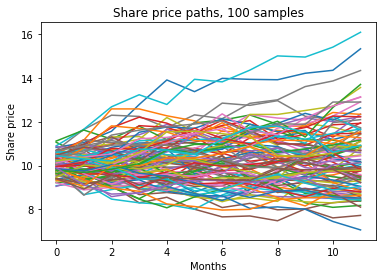

In [67]:
plt.plot(np.transpose(share[0][:100,:]))
plt.title("Share price paths, 100 samples")
plt.xlabel("Months")
plt.ylabel("Share price")
plt.show()

Now that the share paths have been simulted the next step is to define the payoff function of the option and run the Monte Carlo simulation. To value a variety of options edit this section with the appropriate option payoff function.

In [68]:
def up_and_out_call_payoff(S, K, L):
    """Evalutates the European up-and-out call payoff"""
    return np.all(S < L, axis=1) * np.maximum(S[:,-1] - K,0)

In [69]:
np.random.seed(0)

up_and_out_call= [None]*100
up_and_out_call_std= [None]*100

for i in range(100):
    S = share[i]
    u_o_call_payoff = up_and_out_call_payoff(S, K, L)
    up_and_out_call_val = np.exp(-risk_free*T)*u_o_call_payoff
    up_and_out_call[i] = np.mean(up_and_out_call_val)
    up_and_out_call_std[i] = np.std(up_and_out_call_val)/np.sqrt((i+1)*1000)
    

No handles with labels found to put in legend.


       Up and out call value = 0.811992904612614


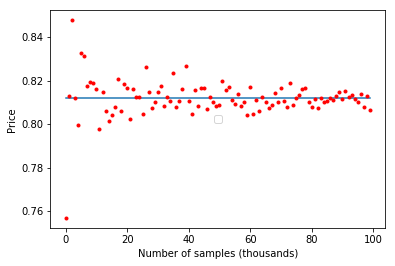

In [73]:
# Plot up-and-out call price 

print("       Up and out call value =", (np.mean(up_and_out_call)))

plt.plot([np.mean(up_and_out_call)]*100)
plt.plot(up_and_out_call, 'r.')    
plt.xlabel("Number of samples (thousands)")
plt.ylabel("Price")
plt.legend(loc='center')
plt.show()




As can be seen above the higher the sample size the less variation from the mean. After 100k Monte Carlo runs the values are reasonably close to the mean.

This code can easily be improvised to solve for a variety of exotic options. Furthermore a CVA adjustment can be included to consider a risky counterparty. 

Finally, using more complex methods for valueing future stock returns and paths will likely result it a better overall model and more accurate pricing.